This script is written to get atmospheric data (pressure, temperature, etc., as a function of altitude, from a local data file.  The data is then plotted, and fit with a user-defined function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

use_errors = False
fit_type = 1

Define a user funcion for fitting the data.

In [2]:
if fit_type == 1:
    def fitfunction(x,a,b):
        return a*np.exp(b*np.array(x))
else:
    def fitfunction(x,a,b,c):
        return a*np.exp(b*np.array(x)+c*np.power(np.array(x),1.5))

Define python arrays to store the data.

In [3]:
altitude = []
temp = []
gravity = []
pressure = []
density = []
viscosity = []

Read data from the filem and store in the above python arrays.

In [4]:
npoints = 0
with open('density.txt') as f:
    for line in f:
        npoints=npoints+1
        data = line.split()
        altitude.append(float(data[0]))
        temp.append(float(data[1]))
        gravity.append(float(data[2]))
        pressure.append(float(data[3]))
        density.append(float(data[4]))
        viscosity.append(float(data[5]))
        

In [5]:

if use_errors == True:
    # create a list to hold the uncertainty in the density  
    density_uncertainty = [0.01,0.01,0.01,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.0001,0.0001,0.0001,0.00001,0.00001,0.000001,0.0000001,0.0000001]
else:
    density_uncertainty = [0.0]*len(density)
    
density_uncertainty = np.array(density_uncertainty)

Text(0, 0.5, 'Gravity (m/s^2)')

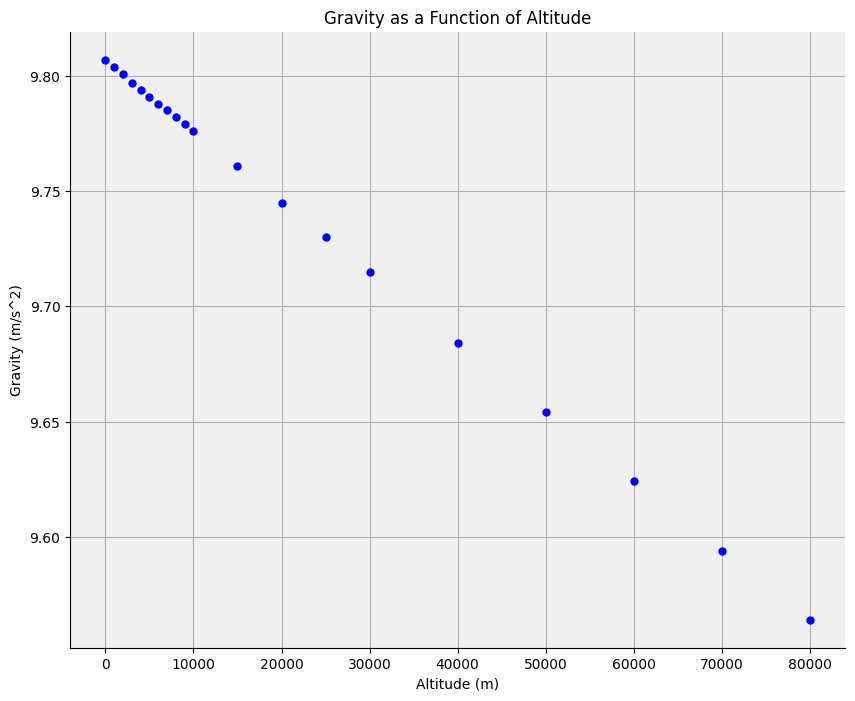

In [11]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
if use_errors == True:
    plt.errorbar(altitude, gravity, yerr=density_uncertainty, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)
else:
    plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
# plt.yscale("log")

Fit the data with the pre-defined function

In [12]:
#!pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/06/15/e73734f9170b66c6a84a0bd7e03586e87e77404e2eb8e34749fc49fa43f7/scipy-1.11.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ------------------- ------------------ 30.7/59.1 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 59.1/59.1 kB 788.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/44.0 MB 3.3 MB/s eta 0:00:14
   ---------------------------------------- 0.3/44.0 MB 4.0 MB/s eta 0:00:12
   ---------------------------------------- 0.3/44.0 MB 2.4 MB/s eta 0:00:19
    --------------------------------------- 0.6/44.0 MB 3.4 MB/s eta 0:00:13
    --------------------------------------- 0.7/44.0 MB 3.4 MB/s eta 0:00:13
    --------------------------------------- 0.7/44.0 MB 2.5 MB/s eta 0:00:18
    ---------------------------

In [13]:
from scipy.optimize import curve_fit

if fit_type == 1:
    init_vals = [12.0,-0.0001]
else:
    init_vals = [12.0,-0.0001, -0.000001]

if use_errors == False:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, sigma=density_uncertainty, absolute_sigma=True, p0=init_vals)

print (popt)
print (pcov)

[ 9.80661109e+00 -3.13369231e-07]
[[ 8.37873627e-09 -1.77980069e-14]
 [-1.77980069e-14  8.29153502e-20]]


In [14]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction(altitude[i],*popt))
    chi2 += (gravity[i]-yfit[i])*(gravity[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

Chi^2 / dof = 1.618E-06 / 18


Draw the graph

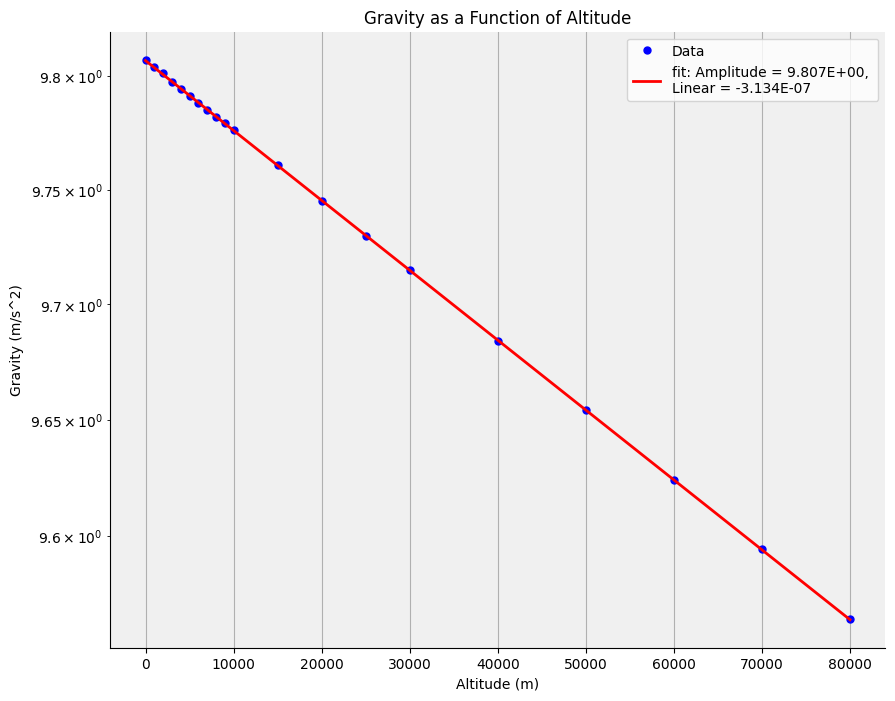

In [16]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')
if fit_type == 1:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E' % tuple(popt))
else:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E, \nQuadratic = %.3E' % tuple(popt))

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
plt.yscale("log")
plt.legend()

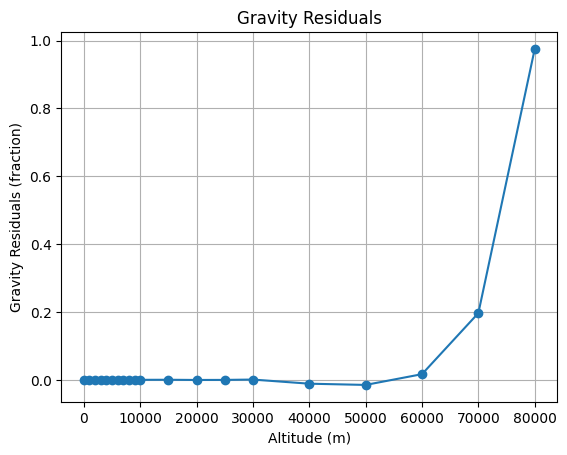

In [17]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (fraction)')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt))/density, 'o-')

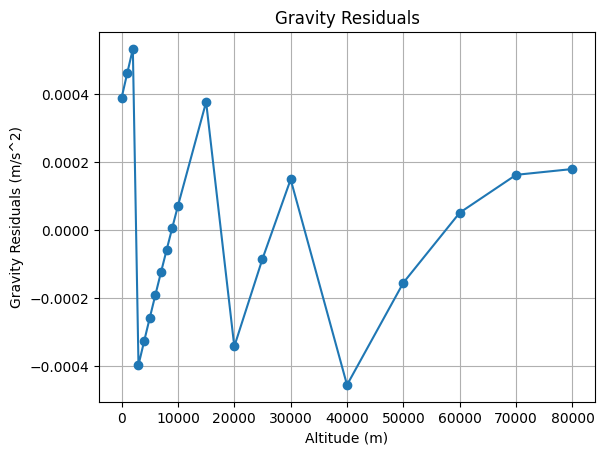

In [18]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s^2)')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt)), 'o-')
residuals = (gravity - fitfunction(altitude, *popt))
popt_exponential = popt

In [19]:
init_vals = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

def residualfunction(x,a,b,c,d,e,f,g,h):
    return a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)


In [20]:
if use_errors == False:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, p0=init_vals)
else:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, sigma=density_uncertainty, absolute_sigma=True, p0=init_vals)

In [21]:
print (popt, pcov)

[ 5.33478213e-04 -2.98844331e-07  4.44548234e-11 -2.75411759e-15
  8.44644838e-20 -1.36561486e-24  1.11974234e-29 -3.67644702e-35] [[ 4.66205555e-08 -2.24019083e-11  3.34974959e-15 -2.19104769e-19
   7.25423411e-24 -1.27088684e-28  1.12290410e-33 -3.93692394e-39]
 [-2.24019083e-11  1.69152640e-14 -3.02138556e-18  2.15612658e-22
  -7.50816599e-27  1.35892678e-31 -1.22812103e-36  4.37730021e-42]
 [ 3.34974959e-15 -3.02138556e-18  5.87452092e-22 -4.38731901e-26
   1.57180051e-30 -2.90072276e-35  2.65877748e-40 -9.57807372e-46]
 [-2.19104769e-19  2.15612658e-22 -4.38731901e-26  3.37262679e-30
  -1.23308241e-34  2.31019045e-39 -2.14213090e-44  7.78734290e-50]
 [ 7.25423411e-24 -7.50816599e-27  1.57180051e-30 -1.23308241e-34
   4.57847635e-39 -8.68155016e-44  8.12703806e-49 -2.97715797e-54]
 [-1.27088684e-28  1.35892678e-31 -2.90072276e-35  2.31019045e-39
  -8.68155016e-44  1.66212111e-48 -1.56814252e-53  5.78122508e-59]
 [ 1.12290410e-33 -1.22812103e-36  2.65877748e-40 -2.14213090e-44
   8.

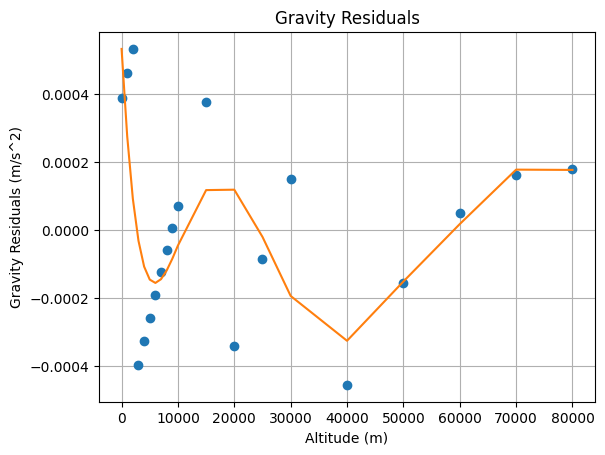

In [22]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s^2)')
plt.grid(True)


plt.plot(altitude, residuals, 'o')
plt.plot(altitude, residualfunction(altitude, *popt), '-')

In [23]:
popt_combined = [popt_exponential[0], popt_exponential[1], popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7]]

In [24]:
def fitfunction_combined(x,a0,a1,a,b,c,d,e,f,g,h):
    return a0*np.exp(a1*np.array(x))+a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)

In [25]:
init_vals = popt_combined
if use_errors == False:
    popt, pcov = curve_fit(fitfunction_combined, altitude, gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction_combined, altitude, gravity, sigma=density_uncertainty, absolute_sigma=True, p0=init_vals)

In [26]:
print (popt, pcov)

[ 9.80661109e+00 -3.13369231e-07  5.33478213e-04 -2.98844331e-07
  4.44548234e-11 -2.75411759e-15  8.44644838e-20 -1.36561486e-24
  1.11974234e-29 -3.67644702e-35] [[ 2.84062187e+00  1.62575928e-06 -2.84070523e+00 -1.50704923e-05
   1.12941474e-11 -7.33381417e-16  3.29717726e-20 -6.95851673e-25
   6.94369626e-30 -2.64794569e-35]
 [ 1.62575928e-06  2.72403906e-09 -1.62638023e-06 -2.67114841e-08
   8.10608869e-15  1.10604026e-20 -1.51991387e-25 -2.38963232e-30
   6.60526231e-35 -3.82395699e-40]
 [-2.84070523e+00 -1.62638023e-06  2.84078864e+00  1.50765289e-05
  -1.12921660e-11  7.33137745e-16 -3.29640047e-20  6.95720111e-25
  -6.94256659e-30  2.64755905e-35]
 [-1.50704923e-05 -2.67114841e-08  1.50765289e-05  2.61928757e-07
  -7.94886295e-14 -1.08425049e-19  1.49154625e-24  2.33821798e-29
  -6.47055017e-34  3.74690238e-39]
 [ 1.12941474e-11  8.10608869e-15 -1.12921660e-11 -7.94886295e-14
   2.48408967e-20 -2.13775522e-26  1.50757734e-30 -4.34708747e-35
   5.31050808e-40 -2.34603810e-45]
 

Chi^2 / dof = 8.901E-07 / 10


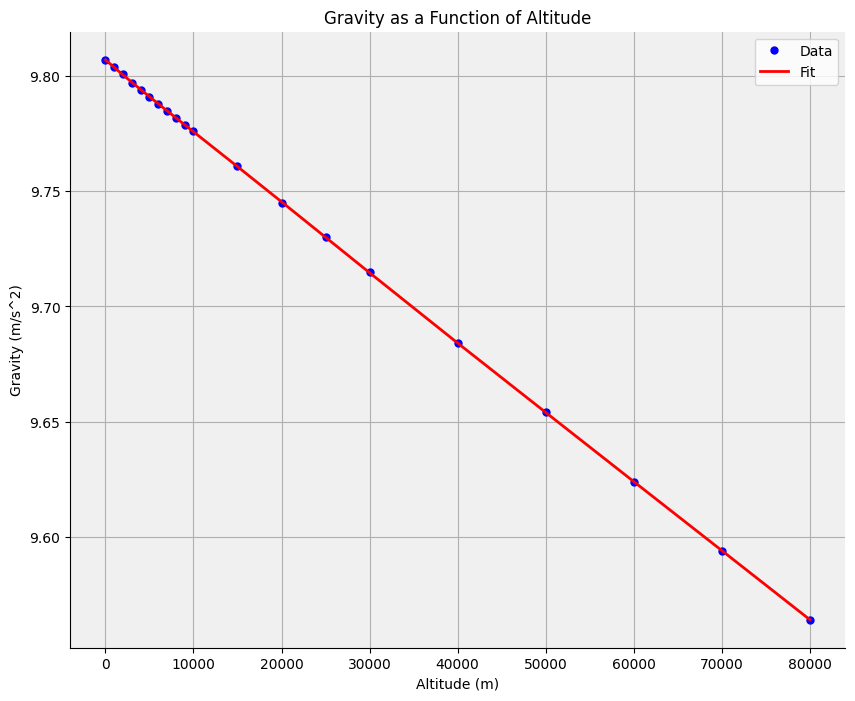

In [27]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction_combined(altitude[i],*popt))
    chi2 += (gravity[i]-yfit[i])*(gravity[i]-yfit[i])
    
print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(altitude,np.abs(yfit),color='r', linewidth=2, label = "Fit")

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
#plt.yscale("log")
plt.legend()